In [20]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [21]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [22]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [23]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [24]:
# Create a DataFrame with the scaled data
# # Copy the crypto names from the original data
# Set the coinid column as index
market_data_scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)



# Display sample data
market_data_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [25]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(market_data_scaled_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.385653
5,6,52.038841
6,7,43.939301
7,8,37.384252
8,9,32.928252
9,10,28.165433


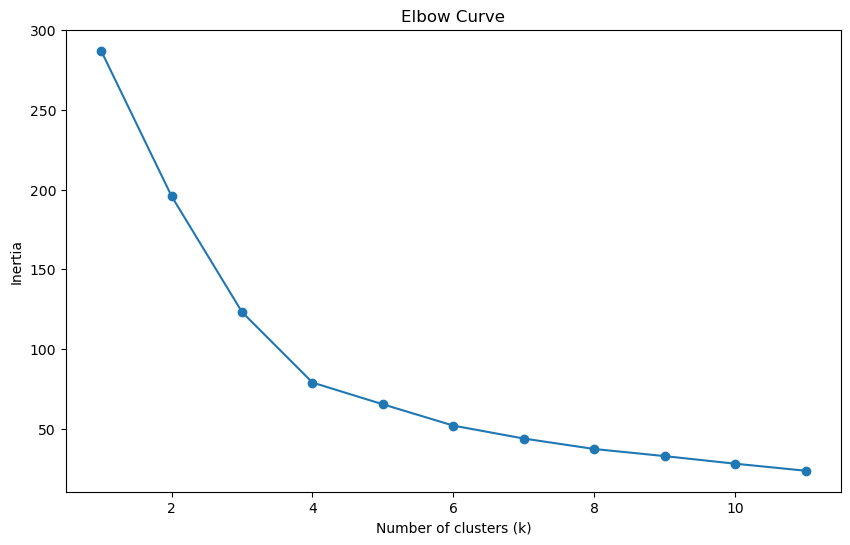

In [28]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

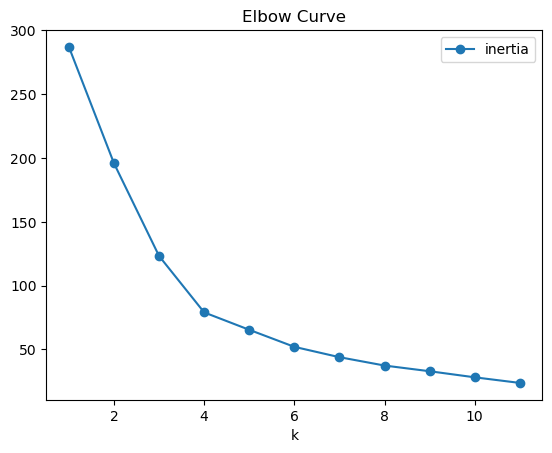

In [29]:
# Plot the Elbow curve
elbow_df.plot(x="k", y="inertia", marker="o", title='Elbow Curve')

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 or 5

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [30]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)

In [31]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [34]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters= kmeans.predict(market_data_scaled_df)

# View the resulting array of cluster values.
clusters

array([3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [35]:
# Create a copy of the DataFrame
clusters_df = market_data_df.copy()

In [37]:
# Add a new column to the DataFrame with the predicted clusters
clusters_df['cluster'] = clusters

# Display sample data
clusters_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


<function matplotlib.pyplot.show(close=None, block=None)>

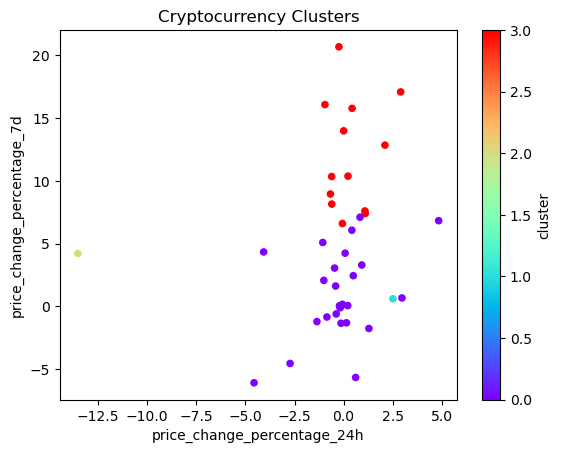

In [43]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clusters_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c= 'cluster', colormap="rainbow")
plt.title('Cryptocurrency Clusters')
plt.show

### Optimize Clusters with Principal Component Analysis.

In [48]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [61]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [55]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3719856 , 0.34700813, 0.17603793])

In [56]:
total_explained_variance = explained_variance.sum()
print(f'Total Explained Variance: {total_explained_variance}')

Total Explained Variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total Explained Variance: 0.8950316570309842

In [65]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
# # Copy the crypto names from the original data
# Set the coinid column as index

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=market_data_df.index)

# Display sample data
pca_df.head()



,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [69]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
pca_k_values = range(1, 12)

# Create an empty list to store the inertia values
pca_inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in pca_k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    pca_inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve

pca_elbow_data = {"k": pca_k_values, "inertia": pca_inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
pca_elbow_df


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.618972
6,7,21.182776
7,8,17.016962
8,9,13.668117
9,10,10.484890


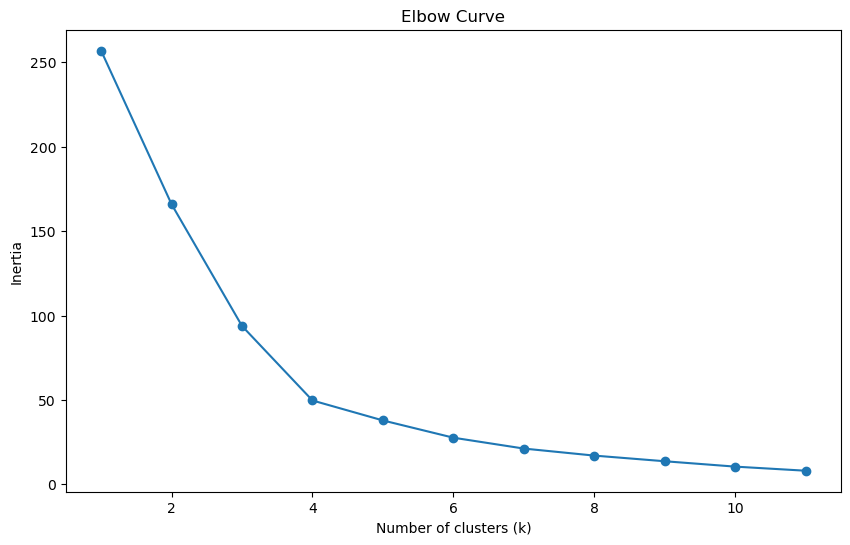

In [70]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(pca_elbow_df['k'], pca_elbow_df['inertia'], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

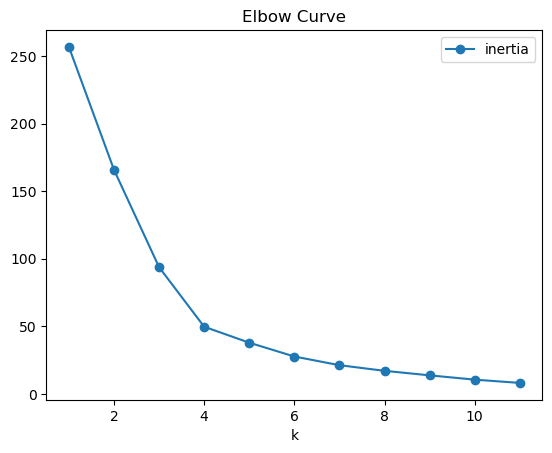

In [71]:
# Plot the Elbow curve
pca_elbow_df.plot(x="k", y="inertia", marker="o", title='Elbow Curve')

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, both were 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [72]:
# Initialize the K-Means model using the best value for k
pca_kmeans = KMeans(n_clusters=4)

In [73]:
# Fit the K-Means model using the PCA data
pca_kmeans.fit(pca_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [75]:
# Predict the clusters to group the cryptocurrencies using the PCA data

pca_clusters= kmeans.predict(pca_df)
# Print the resulting array of cluster values.
pca_clusters


array([ 1,  1,  9,  9,  6,  1,  8,  8,  1,  9,  0,  9,  9,  6,  4,  4,  0,
        4,  8,  9,  0,  1,  9,  9,  5,  9,  4,  0,  1,  7,  4,  4,  2,  4,
       10,  5,  3,  0,  4,  9,  9], dtype=int32)

In [80]:
# Create a copy of the DataFrame with the PCA data
pca_clusters_df = pca_df.copy()

# Add a new column to the Data clusters
pca_clusters_df['clusters'] = pca_clusters

# Display sample data
pca_clusters_df



,PC1,PC2,PC3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,9
ripple,-0.471835,-0.222660,-0.479053,9
bitcoin-cash,-1.157800,2.041209,1.859715,6
binancecoin,-0.516534,1.388377,0.804071,1
chainlink,-0.450711,0.517699,2.846143,8
cardano,-0.345600,0.729439,1.478013,8
litecoin,-0.649468,0.432165,0.600303,1


<function matplotlib.pyplot.show(close=None, block=None)>

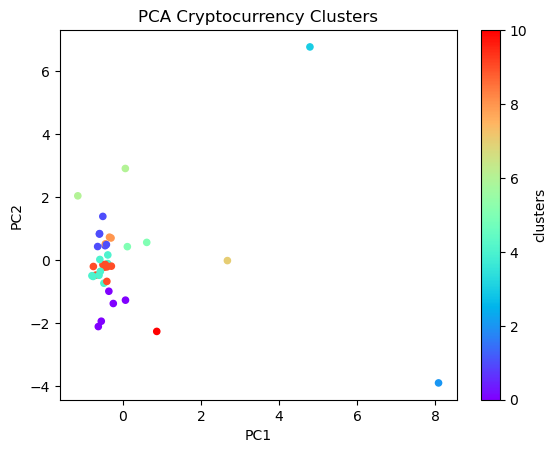

In [83]:
# Create a scatter plot using hvPlot by setting `x= "PCA1"` and `y="PCA2"`. 
pca_clusters_df.plot.scatter(x="PC1", y="PC2", c= 'clusters', colormap="rainbow")
plt.title('PCA Cryptocurrency Clusters')
plt.show

### Determine the Weights of Each Feature on each Principal Component

In [85]:
# Use the columns from the original scaled DataFrame as the index.
pca_weights = pd.DataFrame(pca.components_.T, index=market_data_df.columns, columns=['PC1', 'PC2', 'PC3'])

# Display the weights of each feature on each principal component
print(pca_weights)


                                   PC1       PC2       PC3
price_change_percentage_24h  -0.416728  0.358162 -0.218795
price_change_percentage_7d   -0.102432  0.227432  0.787670
price_change_percentage_14d  -0.009162  0.540415  0.349534
price_change_percentage_30d   0.191523  0.562182 -0.181744
price_change_percentage_60d   0.320365  0.434040 -0.361377
price_change_percentage_200d  0.594468  0.027735  0.039733
price_change_percentage_1y    0.568379 -0.150789  0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PC1
Strongest Positive - price_change_percentage_200d 
Strongest Negative - price_change_percentage_24h

PC2
Strongest Positive - price_change_percentage_30d 
Strongest Negative - price_change_percentage_1y

PC1
Strongest Positive - price_change_percentage_7d 
Strongest Negative - price_change_percentage_60d
    